In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
import scipy.stats as stats

In [3]:
final_data = pd.read_excel(r"C:\Users\PANKAJ GUPTA\Downloads\archive (1)\DATA From Python\final_data.xlsx")
final_data

,Date,BSE,gdp_growth,Fiscal Deficit,Inflation_rate,Repo Rate,credit_growth_in_percent,crisis
0,Jan-2000,5405.267090,0.021,15300.0,0.000000,9.41,0.000000,0.0
1,Feb-2000,5650.590007,0.021,3059.0,-0.232019,9.41,1.737910,0.0
2,Mar-2000,5261.767625,0.021,19276.0,0.930233,9.41,2.214455,0.0
3,Apr-2000,4896.042209,0.021,12799.0,0.921659,10.10,3.232886,0.0
4,May-2000,4253.109974,0.021,10722.0,0.456621,10.10,-0.598449,0.0
...,...,...,...,...,...,...,...,...
313,Aug-2024,80494.182292,0.067,NaN,NaN,6.50,0.593461,0.0
314,Sep-2024,83294.127604,0.067,NaN,NaN,6.50,1.023024,0.0
315,Oct-2024,81079.506037,0.054,NaN,NaN,6.50,1.064620,0.0
316,Nov-2024,79011.402138,0.054,NaN,NaN,6.50,0.977714,0.0


In [163]:
def adf_test(final_data):
    result = adfuller(final_data.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is NOT stationary. Differencing required.")

for col in ['BSE', 'gdp_growth', 'Fiscal Deficit', 'Inflation_rate', 'Repo Rate ', 'credit_growth_in_percent','crisis']:
    print(f"\nTesting stationarity for {col}")
    adf_test(final_data[col])


Testing stationarity for BSE
ADF Statistic: 2.281876019965783
p-value: 0.9989433810073943
The series is NOT stationary. Differencing required.

Testing stationarity for gdp_growth
ADF Statistic: -2.759903915602708
p-value: 0.06423338815438696
The series is NOT stationary. Differencing required.

Testing stationarity for Fiscal Deficit
ADF Statistic: -0.520962871792766
p-value: 0.8878604082435888
The series is NOT stationary. Differencing required.

Testing stationarity for Inflation_rate
ADF Statistic: -2.136628878478057
p-value: 0.23004321029600933
The series is NOT stationary. Differencing required.

Testing stationarity for Repo Rate 
ADF Statistic: -2.886924522272285
p-value: 0.046889762368456774
The series is stationary.

Testing stationarity for credit_growth_in_percent
ADF Statistic: -2.16005587614943
p-value: 0.221060817050673
The series is NOT stationary. Differencing required.

Testing stationarity for crisis
ADF Statistic: -4.254441511510843
p-value: 0.0005322096577314093
T

In [5]:
final_data["BSE_log"] = np.log(final_data["BSE"])
final_data["Fiscal Deficit_log"] = np.log(final_data["Fiscal Deficit"])

C:\Users\PANKAJ GUPTA\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
final_data["BSE_log_diff"] = final_data["BSE_log"].diff()

In [7]:
final_data["fiscal_deficit_log_diff"] = final_data["Fiscal Deficit_log"].diff()

In [8]:
final_data["gdp_diff"] = final_data["gdp_growth"].diff()
final_data['Inflation_diff'] = final_data['Inflation_rate'].diff()

In [9]:
final_data["credit_growth_diff"] = final_data["credit_growth_in_percent"].diff()

In [169]:
def adf_test(final_data):
    result = adfuller(final_data.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is NOT stationary. Differencing required.")

for col in ['BSE_log_diff', 'gdp_diff', 'fiscal_deficit_log_diff', 'Inflation_diff', 'Repo Rate ', 'credit_growth_diff','crisis']:
    print(f"\nTesting stationarity for {col}")
    adf_test(final_data[col])


Testing stationarity for BSE_log_diff
ADF Statistic: -8.49620357347026
p-value: 1.2739127993483403e-13
The series is stationary.

Testing stationarity for gdp_diff
ADF Statistic: -8.386412419489387
p-value: 2.431642622204297e-13
The series is stationary.

Testing stationarity for fiscal_deficit_log_diff
ADF Statistic: -16.609282082042533
p-value: 1.7366567931924478e-29
The series is stationary.

Testing stationarity for Inflation_diff
ADF Statistic: -10.381743056378582
p-value: 2.1302125826383225e-18
The series is stationary.

Testing stationarity for Repo Rate 
ADF Statistic: -2.886924522272285
p-value: 0.046889762368456774
The series is stationary.

Testing stationarity for credit_growth_diff
ADF Statistic: -11.692940895772882
p-value: 1.6362022137224131e-21
The series is stationary.

Testing stationarity for crisis
ADF Statistic: -4.254441511510843
p-value: 0.0005322096577314093
The series is stationary.


In [10]:
final_data.columns.tolist()

['Date',
 'BSE',
 'gdp_growth',
 'Fiscal Deficit',
 'Inflation_rate',
 'Repo Rate ',
 'credit_growth_in_percent',
 'crisis',
 'BSE_log',
 'Fiscal Deficit_log',
 'BSE_log_diff',
 'fiscal_deficit_log_diff',
 'gdp_diff',
 'Inflation_diff',
 'credit_growth_diff']

In [11]:

final_data

,Date,BSE,gdp_growth,Fiscal Deficit,Inflation_rate,Repo Rate,credit_growth_in_percent,crisis,BSE_log,Fiscal Deficit_log,BSE_log_diff,fiscal_deficit_log_diff,gdp_diff,Inflation_diff,credit_growth_diff
0,Jan-2000,5405.267090,0.021,15300.0,0.000000,9.41,0.000000,0.0,8.595129,9.635608,NaN,NaN,NaN,NaN,NaN
1,Feb-2000,5650.590007,0.021,3059.0,-0.232019,9.41,1.737910,0.0,8.639515,8.025843,0.044386,-1.609765,0.000,-0.232019,1.737910
2,Mar-2000,5261.767625,0.021,19276.0,0.930233,9.41,2.214455,0.0,8.568222,9.866616,-0.071293,1.840773,0.000,1.162251,0.476545
3,Apr-2000,4896.042209,0.021,12799.0,0.921659,10.10,3.232886,0.0,8.496182,9.457122,-0.072040,-0.409494,0.000,-0.008574,1.018431
4,May-2000,4253.109974,0.021,10722.0,0.456621,10.10,-0.598449,0.0,8.355406,9.280053,-0.140777,-0.177069,0.000,-0.465038,-3.831335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,Aug-2024,80494.182292,0.067,NaN,NaN,6.50,0.593461,0.0,11.295940,NaN,0.000527,NaN,0.000,NaN,0.481939
314,Sep-2024,83294.127604,0.067,NaN,NaN,6.50,1.023024,0.0,11.330133,NaN,0.034193,NaN,0.000,NaN,0.429564
315,Oct-2024,81079.506037,0.054,NaN,NaN,6.50,1.064620,0.0,11.303186,NaN,-0.026948,NaN,-0.013,NaN,0.041596
316,Nov-2024,79011.402138,0.054,NaN,NaN,6.50,0.977714,0.0,11.277347,NaN,-0.025838,NaN,0.000,NaN,-0.086906


In [56]:
def adf_test(final_data1):
    result = adfuller(final_data1.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is NOT stationary. Differencing required.")

for col in ['BSE_log_diff', 'gdp_diff', 'fiscal_deficit_log_diff', 'Inflation_diff', 'Repo Rate ', 'credit_growth_diff','crisis']:
    print(f"\nTesting stationarity for {col}")
    adf_test(final_data1[col])


Testing stationarity for BSE_log_diff
ADF Statistic: -8.49620357347026
p-value: 1.2739127993483403e-13
The series is stationary.

Testing stationarity for gdp_diff
ADF Statistic: -8.386412419489387
p-value: 2.431642622204297e-13
The series is stationary.

Testing stationarity for fiscal_deficit_log_diff
ADF Statistic: -16.609282082042533
p-value: 1.7366567931924478e-29
The series is stationary.

Testing stationarity for Inflation_diff
ADF Statistic: -10.381743056378582
p-value: 2.1302125826383225e-18
The series is stationary.

Testing stationarity for Repo Rate 
ADF Statistic: -2.886924522272285
p-value: 0.046889762368456774
The series is stationary.

Testing stationarity for credit_growth_diff
ADF Statistic: -11.692940895772882
p-value: 1.6362022137224131e-21
The series is stationary.

Testing stationarity for crisis
ADF Statistic: -4.254441511510843
p-value: 0.0005322096577314093
The series is stationary.


In [12]:
final_data1 = final_data.drop(columns=['BSE','gdp_growth', 'Fiscal Deficit','Inflation_rate','credit_growth_in_percent', 'BSE_log','Fiscal Deficit_log'])
final_data1

,Date,Repo Rate,crisis,BSE_log_diff,fiscal_deficit_log_diff,gdp_diff,Inflation_diff,credit_growth_diff
0,Jan-2000,9.41,0.0,NaN,NaN,NaN,NaN,NaN
1,Feb-2000,9.41,0.0,0.044386,-1.609765,0.000,-0.232019,1.737910
2,Mar-2000,9.41,0.0,-0.071293,1.840773,0.000,1.162251,0.476545
3,Apr-2000,10.10,0.0,-0.072040,-0.409494,0.000,-0.008574,1.018431
4,May-2000,10.10,0.0,-0.140777,-0.177069,0.000,-0.465038,-3.831335
...,...,...,...,...,...,...,...,...
313,Aug-2024,6.50,0.0,0.000527,NaN,0.000,NaN,0.481939
314,Sep-2024,6.50,0.0,0.034193,NaN,0.000,NaN,0.429564
315,Oct-2024,6.50,0.0,-0.026948,NaN,-0.013,NaN,0.041596
316,Nov-2024,6.50,0.0,-0.025838,NaN,0.000,NaN,-0.086906


In [13]:
final_data.columns.tolist()

['Date',
 'BSE',
 'gdp_growth',
 'Fiscal Deficit',
 'Inflation_rate',
 'Repo Rate ',
 'credit_growth_in_percent',
 'crisis',
 'BSE_log',
 'Fiscal Deficit_log',
 'BSE_log_diff',
 'fiscal_deficit_log_diff',
 'gdp_diff',
 'Inflation_diff',
 'credit_growth_diff']

In [14]:
final_data1.columns.tolist()

['Date',
 'Repo Rate ',
 'crisis',
 'BSE_log_diff',
 'fiscal_deficit_log_diff',
 'gdp_diff',
 'Inflation_diff',
 'credit_growth_diff']

# BSE sensex

In [154]:
final_data = final_data1.drop(columns=['BSE_log'])

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

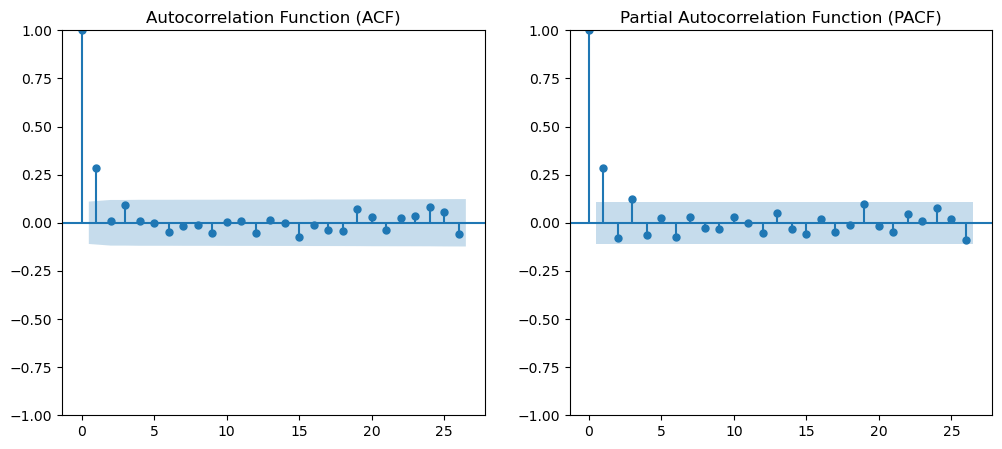

In [175]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(final_data1["BSE_log_diff"].dropna(), ax=ax[0]) 
ax[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(final_data1["BSE_log_diff"].dropna(), ax=ax[1]) 
ax[1].set_title("Partial Autocorrelation Function (PACF)")

In [72]:
model = ARIMA(final_data1["BSE_log_diff"], order=(3,1,1))  
model1 = model.fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:           BSE_log_diff   No. Observations:                  318
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 489.581
Date:                Mon, 03 Feb 2025   AIC                           -969.162
Time:                        23:09:31   BIC                           -950.368
Sample:                             0   HQIC                          -961.655
                                - 318                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3126      0.045      6.968      0.000       0.225       0.401
ar.L2         -0.1248      0.060     -2.086      0.037      -0.242      -0.008
ar.L3          0.1337      0.045      2.976      0.0

C:\Users\PANKAJ GUPTA\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


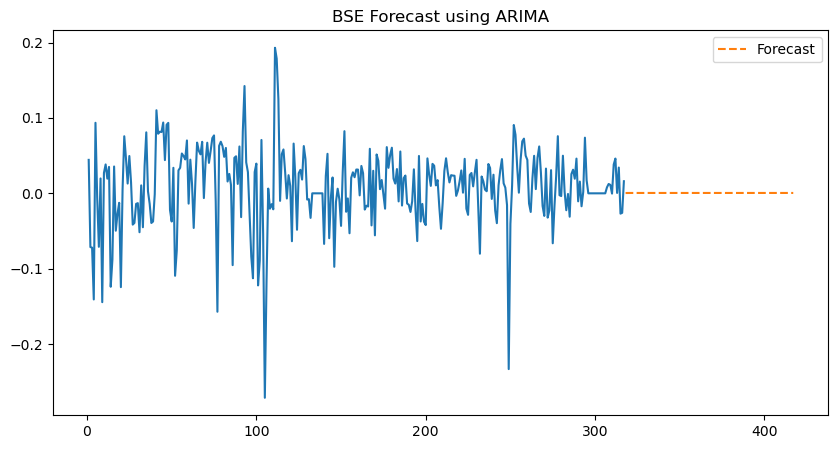

In [180]:
forecast_steps = 100
forecast = model1.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(final_data1.index, final_data1["BSE_log_diff"])
plt.plot(range(len(final_data1), len(final_data1) + forecast_steps), forecast, label="Forecast", linestyle="dashed")
plt.legend()
plt.title("BSE Forecast using ARIMA")
plt.show()

In [118]:
final_data1.dtypes

Date                        object
Repo Rate                  float64
crisis                     float64
Inflation_diff             float64
credit_growth_diff         float64
gdp_diff                   float64
BSE_log_diff               float64
fiscal_deficit_log_diff    float64
BSE_log                    float64
dtype: object

# gdp

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

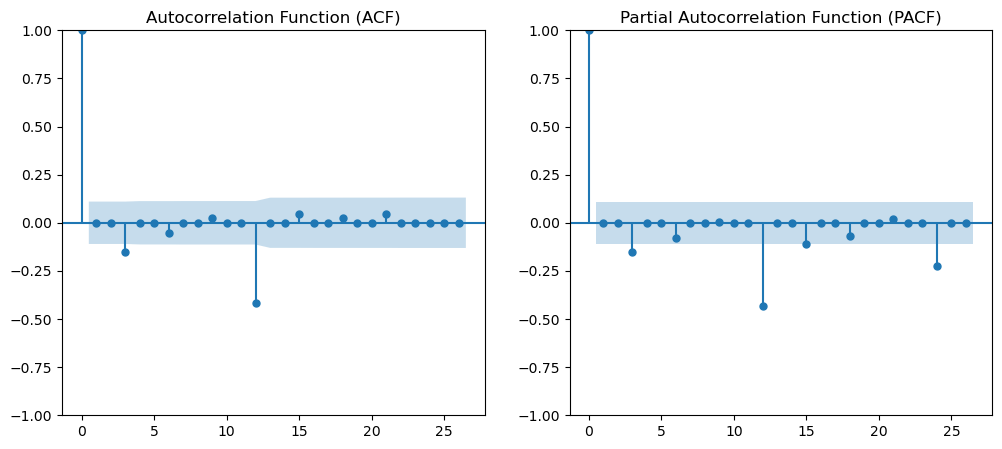

In [127]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(final_data1["gdp_diff"].dropna(), ax=ax[0]) 
ax[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(final_data1["gdp_diff"].dropna(), ax=ax[1]) 
ax[1].set_title("Partial Autocorrelation Function (PACF)")

In [131]:
model = ARIMA(final_data1["gdp_diff"], order=(1,1,1))  
model1 = model.fit()
print(model1.summary()) 

                               SARIMAX Results                                
Dep. Variable:               gdp_diff   No. Observations:                  318
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 626.742
Date:                Tue, 04 Feb 2025   AIC                          -1247.483
Time:                        00:12:13   BIC                          -1236.206
Sample:                             0   HQIC                         -1242.979
                                - 318                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0028      0.773      0.004      0.997      -1.512       1.518
ma.L1         -1.0000      3.002     -0.333      0.739      -6.883       4.883
sigma2         0.0010      0.003      0.334      0.7

# credit

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

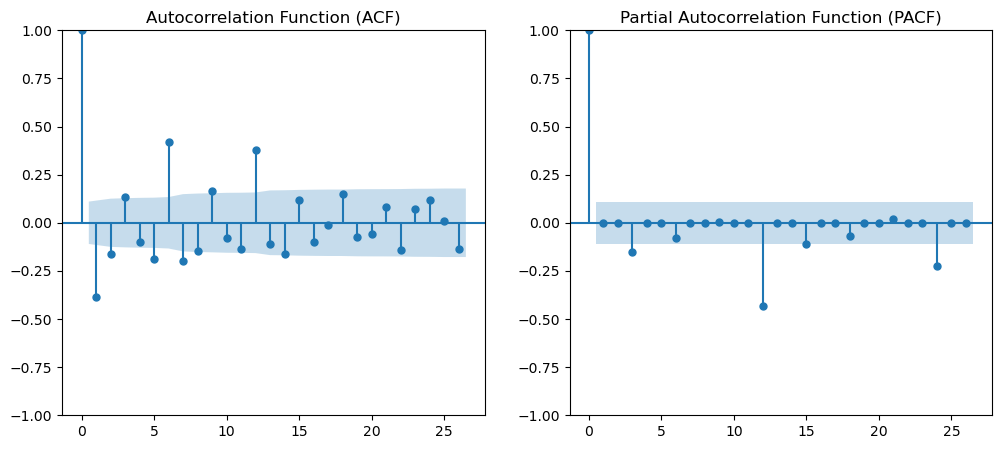

In [132]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(final_data1["credit_growth_diff"].dropna(), ax=ax[0]) 
ax[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(final_data1["gdp_diff"].dropna(), ax=ax[1]) 
ax[1].set_title("Partial Autocorrelation Function (PACF)")

In [134]:
model = ARIMA(final_data1["BSE_log_diff"], order=(1,1,1))  
model1 = model.fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:           BSE_log_diff   No. Observations:                  318
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   0.000
Date:                Tue, 04 Feb 2025   AIC                              6.000
Time:                        00:13:35   BIC                             17.277
Sample:                             0   HQIC                            10.504
                                - 318                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.0

C:\Users\PANKAJ GUPTA\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\PANKAJ GUPTA\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3014: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
C:\Users\PANKAJ GUPTA\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3014: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse
C:\Users\PANKAJ GUPTA\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1420: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
C:\Users\PANKAJ GUPTA\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:693: RuntimeWarning: invalid value encountered in divide
  acf = a

# crisis

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

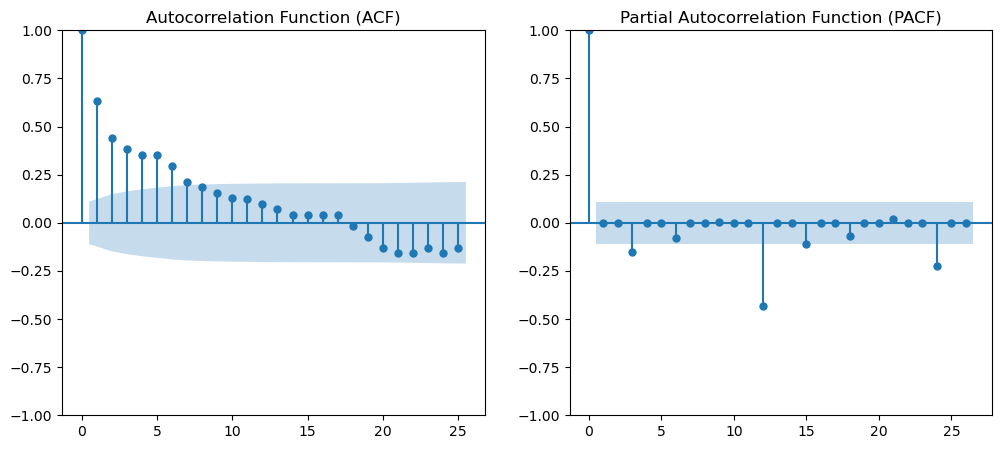

In [135]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(final_data1["crisis"].dropna(), ax=ax[0]) 
ax[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(final_data1["gdp_diff"].dropna(), ax=ax[1]) 
ax[1].set_title("Partial Autocorrelation Function (PACF)")

In [138]:
model = ARIMA(final_data1["crisis"], order=(1,1,1))  
model1 = model.fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                 crisis   No. Observations:                  318
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -24.412
Date:                Tue, 04 Feb 2025   AIC                             54.823
Time:                        00:16:32   BIC                             66.100
Sample:                             0   HQIC                            59.328
                                - 318                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4659      0.055      8.485      0.000       0.358       0.574
ma.L1         -0.8715      0.039    -22.574      0.000      -0.947      -0.796
sigma2         0.0682      0.003     25.117      0.0

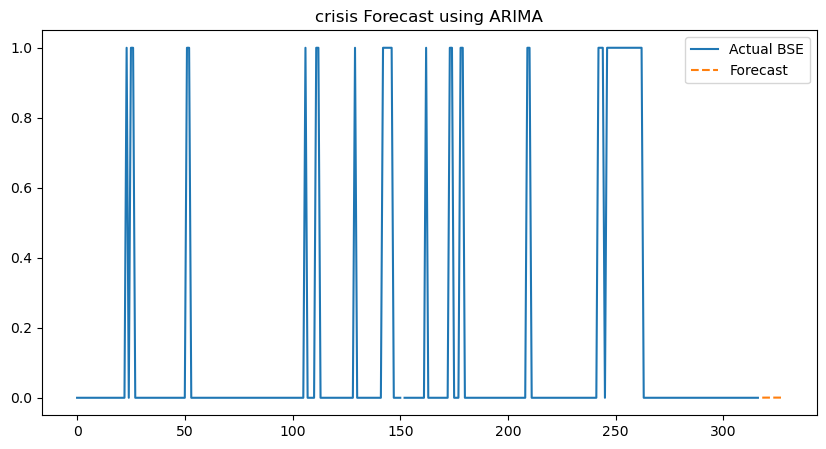

In [142]:
forecast_steps = 10
forecast = model1.forecast(steps=forecast_steps)  
plt.figure(figsize=(10, 5))
plt.plot(final_data1.index, final_data1["crisis"], label="Actual BSE")
plt.plot(range(len(final_data1), len(final_data1) + forecast_steps), forecast, label="Forecast", linestyle="dashed")
plt.legend()
plt.title("crisis Forecast using ARIMA")
plt.show()

# regression

In [16]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
final_data1.isna().sum()

Date                       0
Repo Rate                  0
crisis                     0
BSE_log_diff               0
fiscal_deficit_log_diff    0
gdp_diff                   0
Inflation_diff             0
credit_growth_diff         0
dtype: int64

In [25]:
final_data1.fillna(0,inplace=True)

In [34]:
X = final_data1[['Repo Rate ', 'crisis', 'Inflation_diff', 'credit_growth_diff', 'gdp_diff', 'fiscal_deficit_log_diff']]
y = final_data1['BSE_log_diff']  
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           BSE_log_diff   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.378
Date:                Tue, 04 Feb 2025   Prob (F-statistic):              0.224
Time:                        22:00:16   Log-Likelihood:                 397.22
No. Observations:                 254   AIC:                            -780.4
Df Residuals:                     247   BIC:                            -755.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

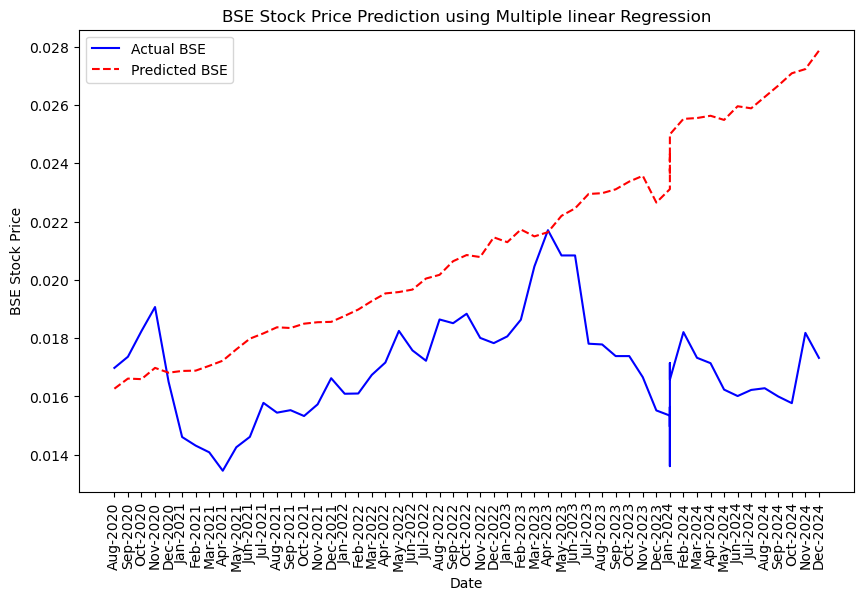

In [45]:
y_pred = model.predict(X_test)
last_real_BSE = np.log(final_data1["BSE_log_diff"].iloc[-1])  
forecast_cumsum = y_pred.cumsum() + last_real_BSE
forecast_real = np.exp(forecast_cumsum)
plt.figure(figsize=(10, 6))
plt.plot(final_data1['Date'].iloc[-len(y_test):], np.exp(y_test.cumsum() + last_real_BSE), label="Actual BSE", color='blue')
plt.plot(final_data1['Date'].iloc[-len(y_test):], forecast_real, label="Predicted BSE", linestyle="dashed", color="red")
plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.ylabel("BSE Stock Price")
plt.legend()
plt.title("BSE Stock Price Prediction using Multiple linear Regression")
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(np.exp(y_test.cumsum() + last_real_BSE), forecast_real))
print(f"RMSE: {rmse}")

RMSE: 0.005994742306578485


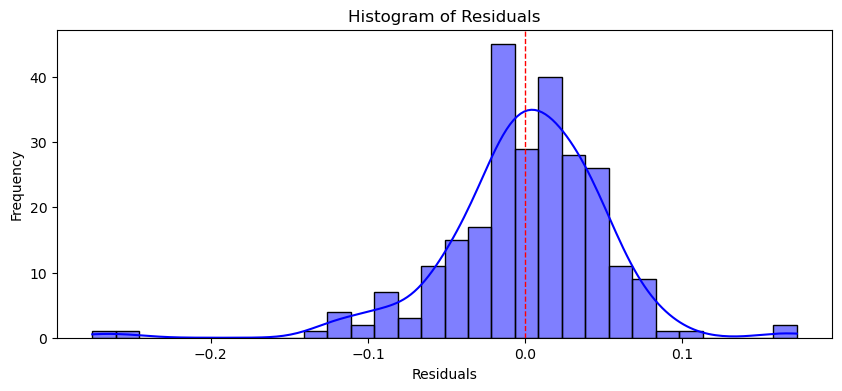

In [57]:
residuals = model.resid
plt.figure(figsize=(10,4))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

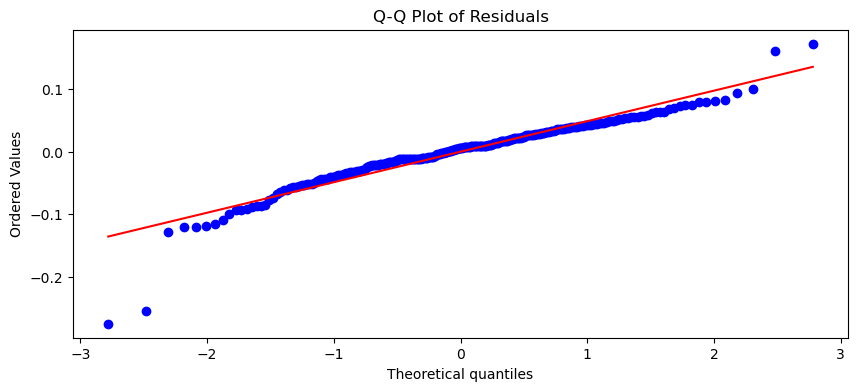

In [58]:
plt.figure(figsize=(10, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()
fitted_values = model.fittedvalues

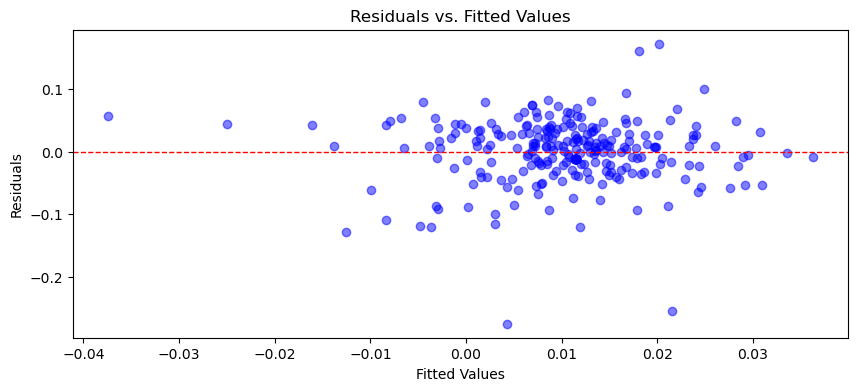

In [59]:
plt.figure(figsize=(10, 4))
plt.scatter(fitted_values, residuals, alpha=0.5, color="blue")
plt.axhline(0, color='red', linestyle='dashed', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

In [63]:
X = final_data1[['Repo Rate ', 'BSE_log_diff', 'Inflation_diff', 'credit_growth_diff', 'gdp_diff', 'fiscal_deficit_log_diff']]
y = final_data1['crisis']  
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 crisis   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     3.721
Date:                Tue, 04 Feb 2025   Prob (F-statistic):            0.00146
Time:                        22:18:09   Log-Likelihood:                -81.876
No. Observations:                 254   AIC:                             177.8
Df Residuals:                     247   BIC:                             202.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [64]:
X = final_data1[['Repo Rate ', 'BSE_log_diff', 'Inflation_diff', 'credit_growth_diff', 'crisis', 'fiscal_deficit_log_diff']]
y = final_data1['gdp_diff']  
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               gdp_diff   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.1597
Date:                Tue, 04 Feb 2025   Prob (F-statistic):              0.987
Time:                        22:18:49   Log-Likelihood:                 519.78
No. Observations:                 254   AIC:                            -1026.
Df Residuals:                     247   BIC:                            -1001.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     